In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  ## for heatmap

#Train and slipt
import sklearn
from sklearn.model_selection import train_test_split###For test train split
#from sklearn.preprocessing import MinMaxScaler

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor  ### For VIF calcualation 



In [3]:
#read the data set
cart_data=pd.read_csv("day.csv")

In [316]:
cart_data.head(10)##Display 10 records to identify the variables and their values 

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [11]:
cart_data.shape##Check the dimension of the data 

(730, 16)

In [12]:
cart_data.info()  ###Evaluate the data types with in the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [13]:
cart_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [54]:
#Validating if any of the fields have null values:
print(cart_data.isnull().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [55]:
#Removing the unnecessary columns:
#Columns instant, dteday, casual and registered can be removed since , instant indicates just a record number, dteday fields is not required since we already have yr and mnth.
#Casual and registered fields together form the target variable cnt hence it can be ignored.
cart_df=cart_data[["season","yr","mnth","holiday","weekday","workingday","weathersit","temp","atemp","hum","windspeed","cnt"]] 

In [56]:
cart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [57]:
##Below are the fields identified as categorical data 

cart_df['season'] = pd.Categorical(cart_df.season)
cart_df['yr'] = pd.Categorical(cart_df.yr)
cart_df['holiday'] = pd.Categorical(cart_df.holiday)
cart_df['workingday'] = pd.Categorical(cart_df.workingday)
cart_df['weathersit'] = pd.Categorical(cart_df.weathersit)
cart_df['mnth']=pd.Categorical(cart_df.mnth)
cart_df['weekday']=pd.Categorical(cart_df.weekday)

/var/folders/qg/6s7hz2v50bn4mdctbj1zs8_w0000gn/T/ipykernel_3565/3517723697.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cart_df['season'] = pd.Categorical(cart_df.season)
/var/folders/qg/6s7hz2v50bn4mdctbj1zs8_w0000gn/T/ipykernel_3565/3517723697.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cart_df['yr'] = pd.Categorical(cart_df.yr)
/var/folders/qg/6s7hz2v50bn4mdctbj1zs8_w0000gn/T/ipykernel_3565/3517723697.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

In [60]:
#Creating dummy variables for the categorical variables
cart_df = pd.get_dummies(cart_df, drop_first=True)
cart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   temp          730 non-null    float64
 1   atemp         730 non-null    float64
 2   hum           730 non-null    float64
 3   windspeed     730 non-null    float64
 4   cnt           730 non-null    int64  
 5   season_2      730 non-null    uint8  
 6   season_3      730 non-null    uint8  
 7   season_4      730 non-null    uint8  
 8   yr_1          730 non-null    uint8  
 9   mnth_2        730 non-null    uint8  
 10  mnth_3        730 non-null    uint8  
 11  mnth_4        730 non-null    uint8  
 12  mnth_5        730 non-null    uint8  
 13  mnth_6        730 non-null    uint8  
 14  mnth_7        730 non-null    uint8  
 15  mnth_8        730 non-null    uint8  
 16  mnth_9        730 non-null    uint8  
 17  mnth_10       730 non-null    uint8  
 18  mnth_11       730 non-null    

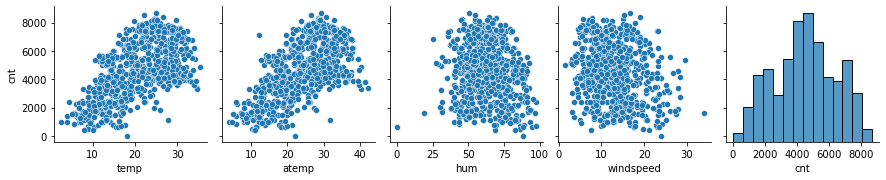

In [63]:
###Pair plot fot all General Date Variables 
sns.pairplot(data=cart_df,x_vars=["temp","atemp","hum","windspeed","cnt",],y_vars="cnt")
plt.show()


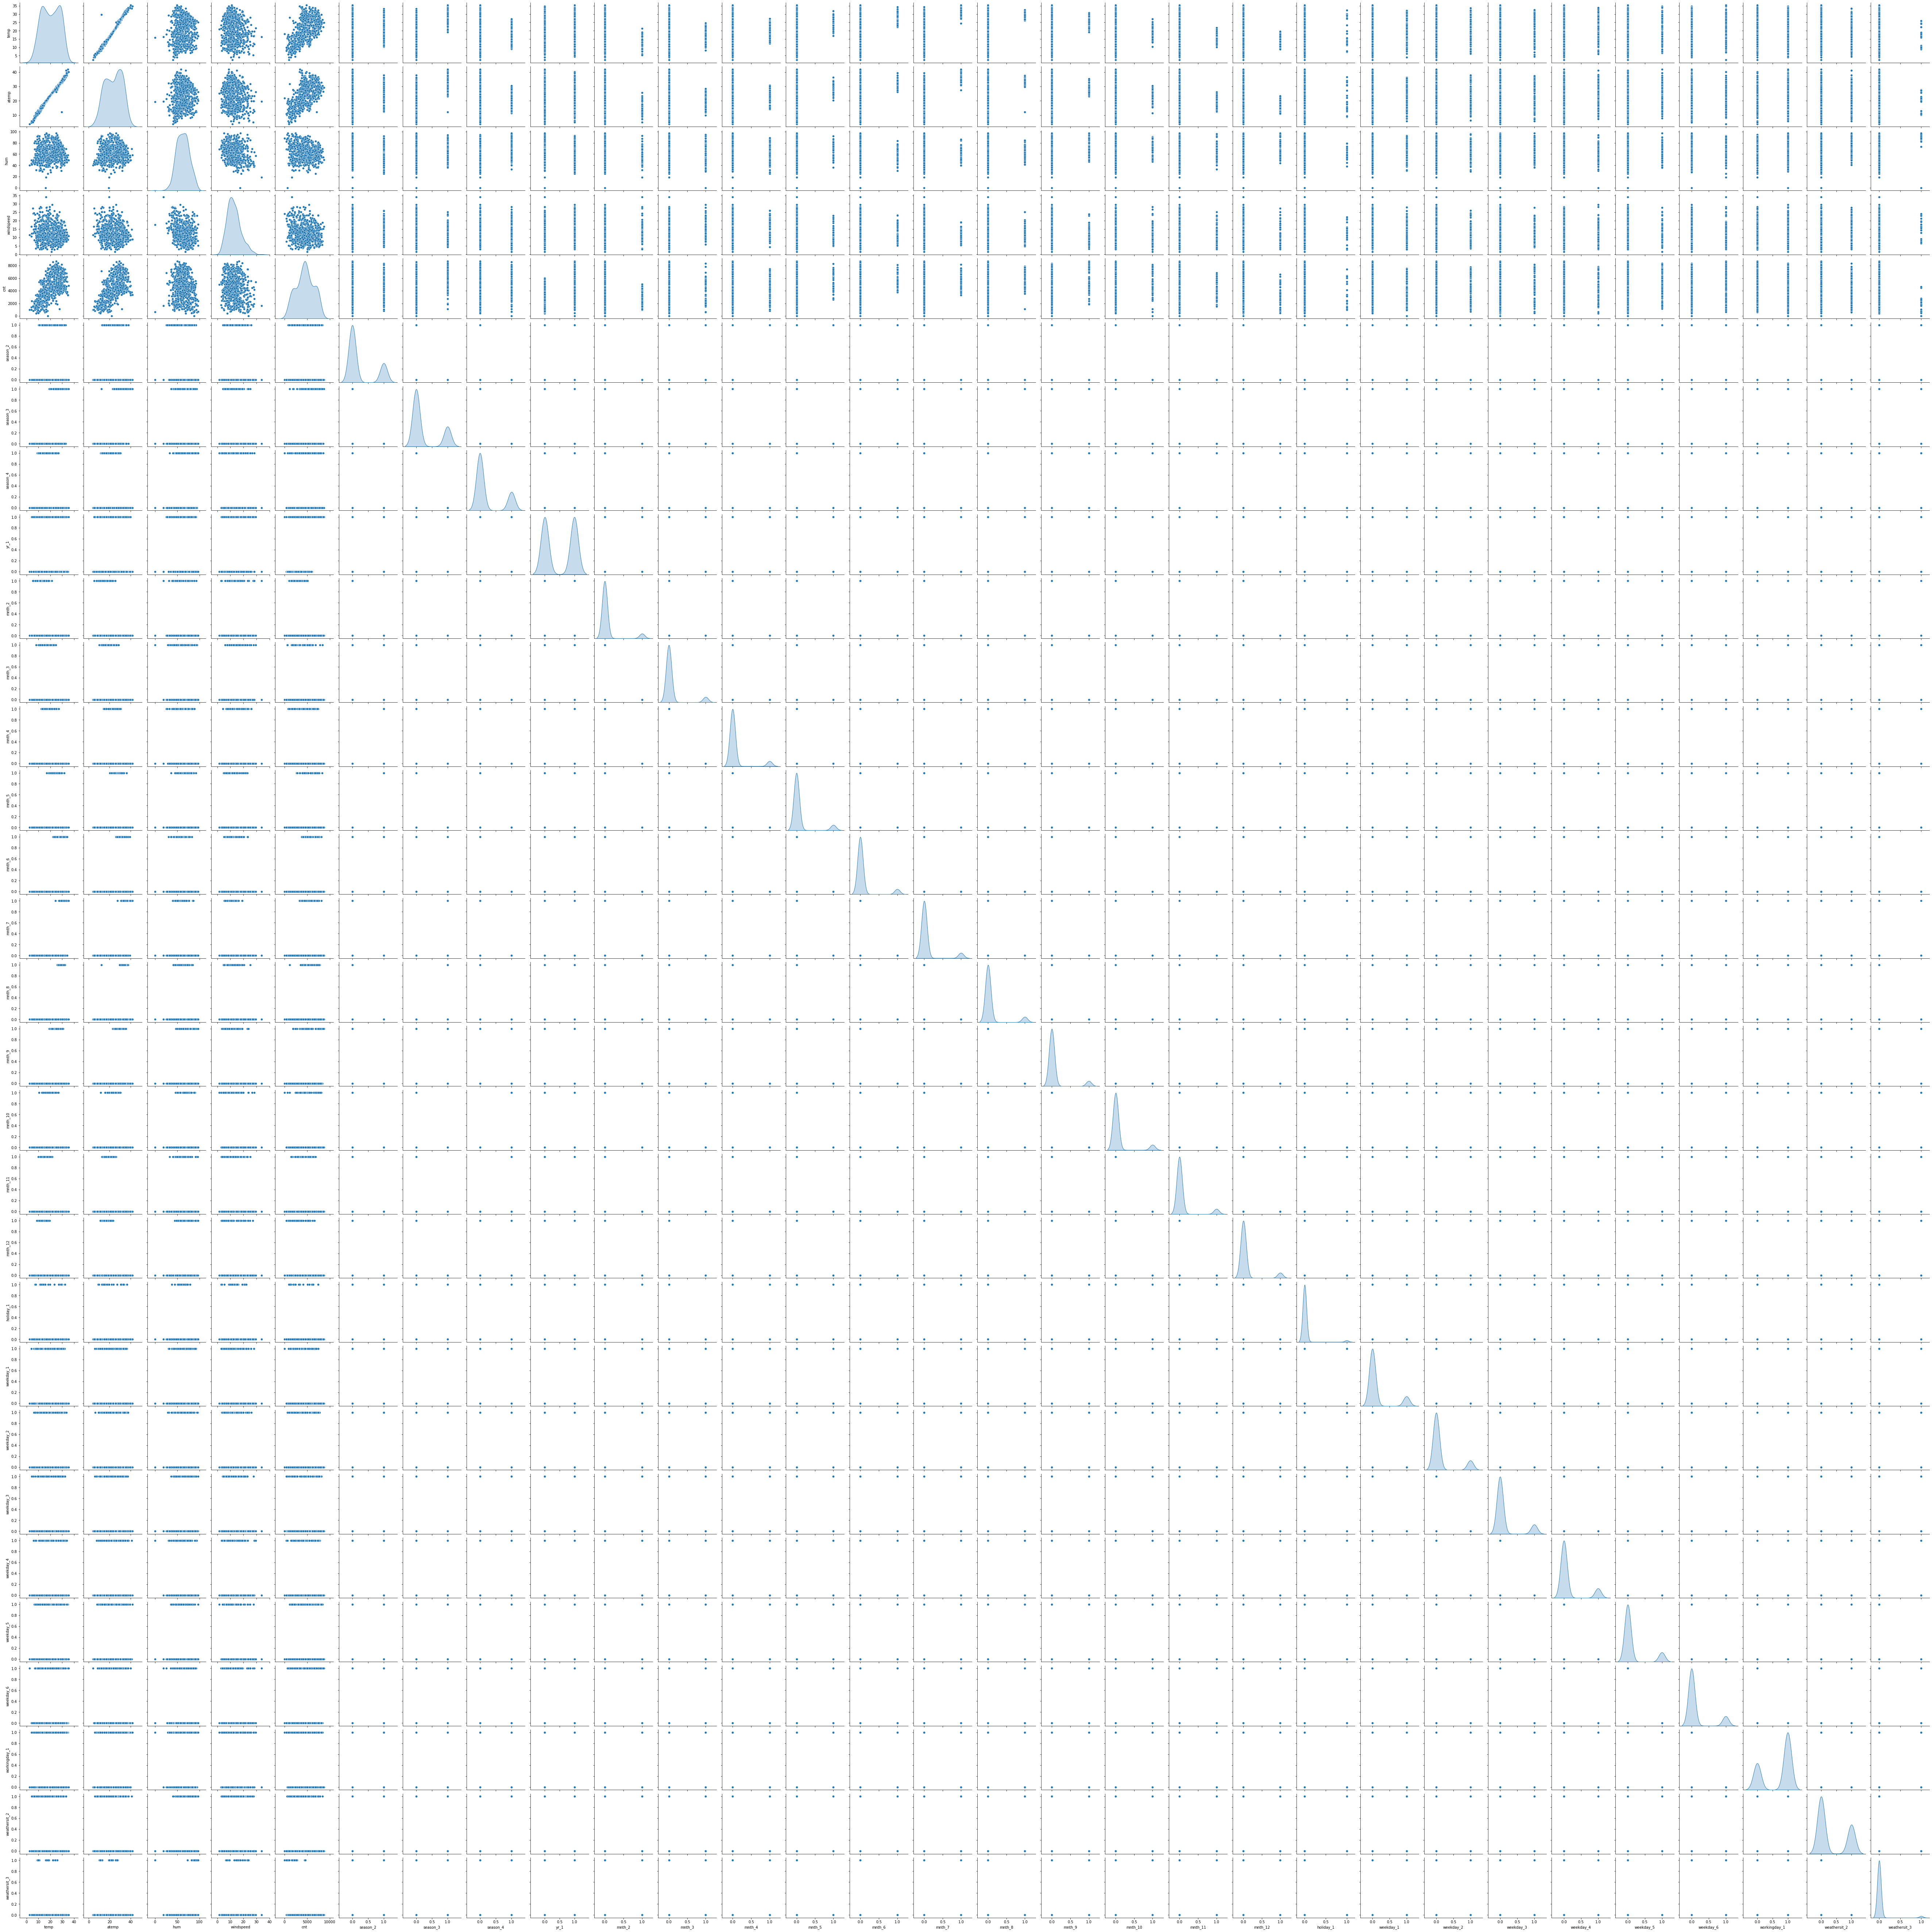

In [64]:
sns.pairplot(cart_df, diag_kind='kde')
plt.show()

Box plot of Season



<AxesSubplot:xlabel='weathersit', ylabel='cnt'>

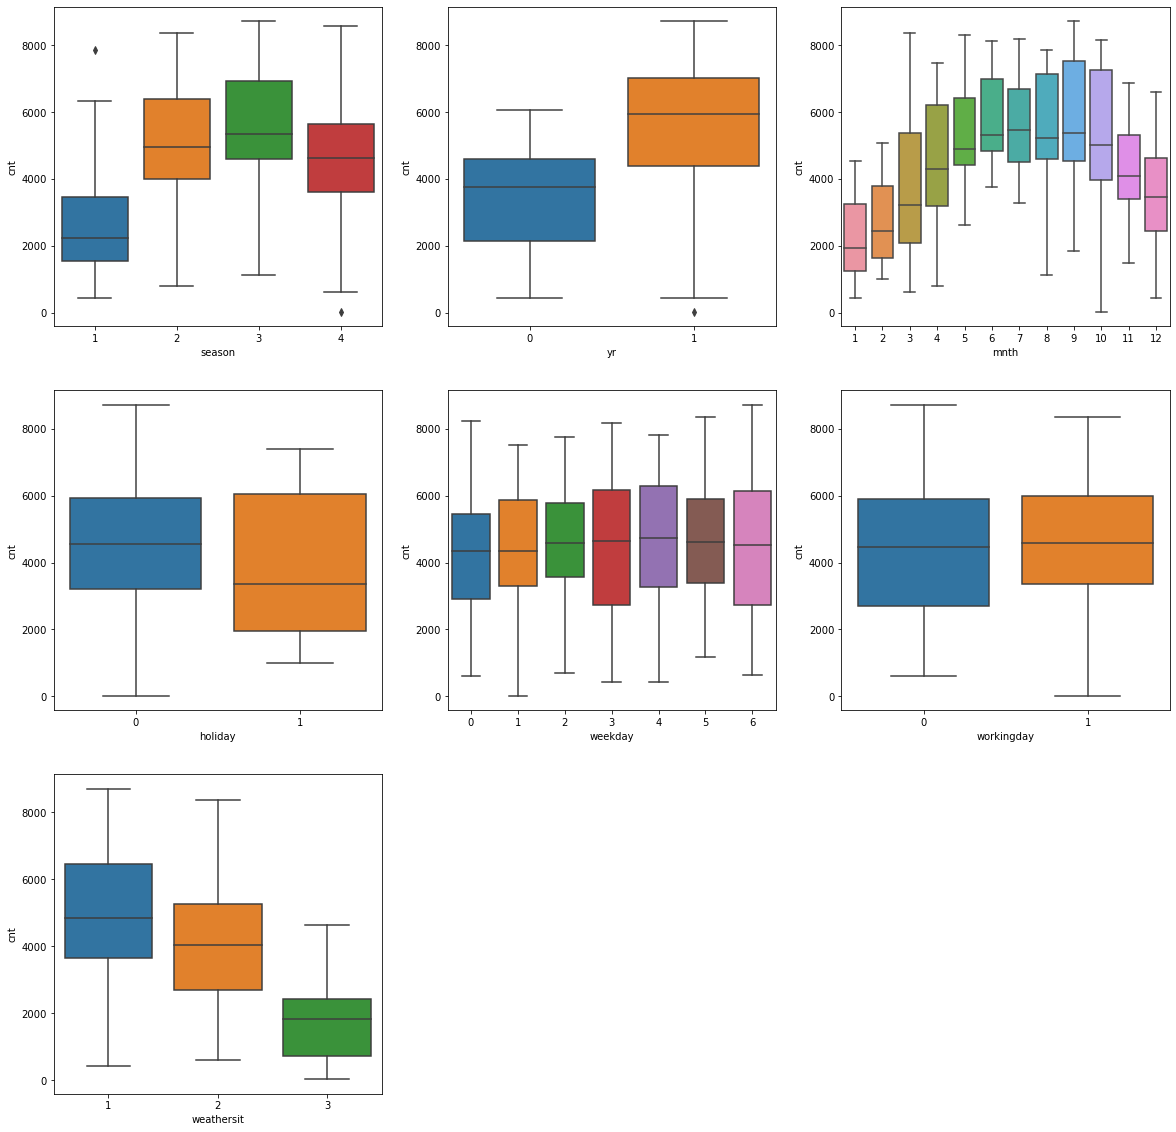

In [65]:
plt.figure(figsize=(20,20))
print("Box plot of Season\n")
plt.subplot(3,3,1)
sns.boxplot(x='season',y='cnt',data=cart_data)
##INference : Max booking for 3 rd season and the median is around 5000 and majority of the bookings are above the median  
#Upper quartiles are above 4.5

#For Second sason medain is around 5K ,but Upper quartile is above only 4k,mostly above 4k
#For fourth season medain is around 4.5 ,but its almost equaly for both the quartiles 
#For First season medain is around 2k ,but the upper quartiles falls between 2 k to 3.5k

plt.subplot(3,3,2)
sns.boxplot(x='yr',y='cnt',data=cart_data)
## for 2018 Median is less than 4k majority of the data Lower quartile 
## for 2019 Median is less than 6k majority of the data Lower quartile but the upper qurtile is more than 6k. 

plt.subplot(3,3,3)
sns.boxplot(x='mnth',y='cnt',data=cart_data)
##There is a steady increase in months especially towards 5,6,7,8,9,20 and for 11 and 12 it drops.
##and for these months the majjority of the data liles with upper quartile 

plt.subplot(3,3,4)
sns.boxplot(x='holiday',y='cnt',data=cart_data)
##Holiday has a balanced quartile where the data is almost equally divided.
##For not holiday majority of cnt comes in the upper quasrtile so that above the median value,

plt.subplot(3,3,5)
sns.boxplot(x='weekday',y='cnt',data=cart_data)
##mostly equally distributed bust most of the time its inline with the median and average is more than 4k


plt.subplot(3,3,6)
sns.boxplot(x='workingday',y='cnt',data=cart_data)

##mostly equally distributed for working day bust most of the time its inline with the median and average is more than 4k
##holyday mostly in lower quartile.


plt.subplot(3,3,7)
sns.boxplot(x='weathersit',y='cnt',data=cart_data)

#1 +ver correlation and best time ,most of the time it is above the median ...mostly upper quarentile 
#2 Mostly balanced one ...where most of the time it inlines with the median 
#3Mostly the counts are less than the median ...lower quartile 
#4No data.


<AxesSubplot:>

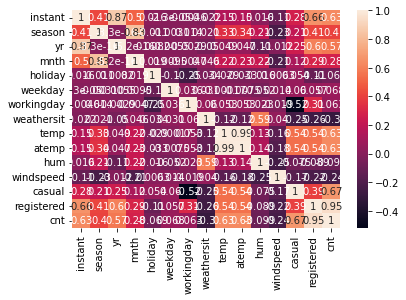

In [67]:
sns.heatmap(cart_data.corr(), annot=True) ##Generate the heat map for the same 

<AxesSubplot:>

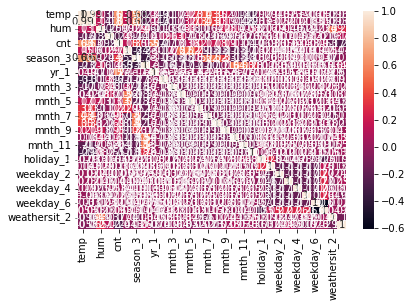

In [68]:
sns.heatmap(cart_df.corr(), annot=True) ##Generate the heat map for the same 

In [ ]:
##Correlation is very High for temp and Count 
##Correlation is very high for a temp and Count
##Correlation is  for a hum and Count

In [159]:
##When we add categorical value month and season also has some correlation on the same 
cart_df.head(10)

,temp,atemp,hum,windspeed,cnt,season_2,season_3,season_4,yr_1,mnth_2,...,holiday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weathersit_2,weathersit_3
0,14.110847,18.18125,80.5833,10.749882,985,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,14.902598,17.68695,69.6087,16.652113,801,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
5,8.378268,11.66045,51.8261,6.000868,1606,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
6,8.057402,10.44195,49.8696,11.304642,1510,0,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0
7,6.765000,8.11270,53.5833,17.875868,959,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
8,5.671653,5.80875,43.4167,24.250650,822,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,6.184153,7.54440,48.2917,14.958889,1321,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [163]:
##test-train split
df_train,df_test=train_test_split(cart_df,train_size=0.7,random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 30)
(220, 30)


In [165]:
df_test

,temp,atemp,hum,windspeed,cnt,season_2,season_3,season_4,yr_1,mnth_2,...,holiday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weathersit_2,weathersit_3
184,29.793347,33.27085,63.7917,5.459106,6043,0,1,0,0,0,...,1,1,0,0,0,0,0,0,1,0
535,32.082500,36.04875,59.2083,7.625404,6211,1,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
299,19.270000,22.85230,81.2917,13.250121,2659,0,0,1,0,0,...,0,0,0,0,1,0,0,1,1,0
221,31.433347,34.24915,42.4167,13.417286,4780,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
152,29.315000,32.19710,30.5000,19.583229,4968,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,19.509153,23.45270,73.3750,11.666643,6606,0,0,1,1,0,...,0,0,1,0,0,0,0,1,0,0
127,21.661653,25.94665,63.1667,5.000712,4333,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
640,26.957500,29.95665,79.3750,4.458569,7572,0,0,1,1,0,...,0,0,0,1,0,0,0,1,1,0
72,13.333897,16.60000,49.6957,9.174042,2046,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [162]:
cart_df

,temp,atemp,hum,windspeed,cnt,season_2,season_3,season_4,yr_1,mnth_2,...,holiday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weathersit_2,weathersit_3
0,14.110847,18.18125,80.5833,10.749882,985,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,14.902598,17.68695,69.6087,16.652113,801,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,10.420847,11.33210,65.2917,23.458911,2114,0,0,0,1,0,...,0,0,0,0,1,0,0,1,1,0
726,10.386653,12.75230,59.0000,10.416557,3095,0,0,0,1,0,...,0,0,0,0,0,1,0,1,1,0
727,10.386653,12.12000,75.2917,8.333661,1341,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
728,10.489153,11.58500,48.3333,23.500518,1796,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [156]:
###Since the scale of some fields are different we need to make it into a common format
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp', 'atemp', 'hum', 'windspeed']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

/Users/hari/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


,temp,atemp,hum,windspeed,season_2,season_3,season_4,yr_1,mnth_2,mnth_3,...,holiday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weathersit_2,weathersit_3
576,0.815169,0.766351,0.725633,0.264686,0,1,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
426,0.442393,0.438975,0.640189,0.255342,0,0,0,1,0,1,...,0,0,0,0,0,0,1,0,1,0
728,0.245101,0.200348,0.498067,0.663106,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
482,0.395666,0.391735,0.504508,0.188475,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
111,0.345824,0.318819,0.751824,0.380981,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0


In [296]:
###Applying the scaling on the test data also..For some reason trasform was not transforming the data and it got only fixed 
###Once replaced with fit_transform
num_vars = ['temp', 'atemp', 'hum', 'windspeed']
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])
df_test.head()

/Users/hari/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


,temp,atemp,hum,windspeed,season_2,season_3,season_4,yr_1,mnth_2,mnth_3,...,holiday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weathersit_2,weathersit_3
184,0.837241,0.778767,0.534223,0.149393,0,1,0,0,0,0,...,1,1,0,0,0,0,0,0,1,0
535,0.911423,0.855132,0.470417,0.231142,1,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
299,0.496221,0.492359,0.777843,0.443398,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,1,0
221,0.890387,0.805661,0.236659,0.449707,0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
152,0.821739,0.749249,0.070765,0.682387,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [157]:
print(cart_df.shape)

(730, 30)


In [158]:
df_train

,temp,atemp,hum,windspeed,season_2,season_3,season_4,yr_1,mnth_2,mnth_3,...,holiday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weathersit_2,weathersit_3
576,0.815169,0.766351,0.725633,0.264686,0,1,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
426,0.442393,0.438975,0.640189,0.255342,0,0,0,1,0,1,...,0,0,0,0,0,0,1,0,1,0
728,0.245101,0.200348,0.498067,0.663106,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
482,0.395666,0.391735,0.504508,0.188475,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
111,0.345824,0.318819,0.751824,0.380981,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,0.863973,0.824359,0.679690,0.187140,0,1,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
53,0.202618,0.218747,0.435939,0.111379,0,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
350,0.248216,0.223544,0.577930,0.431816,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
79,0.462664,0.434043,0.759870,0.529881,1,0,0,0,0,1,...,0,1,0,0,0,0,0,1,1,0


In [ ]:
###All Tranasormation or Data Preparation is over 

In [79]:
###drop count from the above data set as that is the predicated value
y_train=df_train.pop("cnt")#####Drop to be used 

In [26]:
y_train  ###Evaluate the y_train values

576    7216
426    4066
728    1796
482    4220
111    1683
       ... 
578    7261
53     1917
350    2739
79     2077
520    7001
Name: cnt, Length: 510, dtype: int64

In [80]:
X_train=df_train

In [81]:
X_train

,temp,atemp,hum,windspeed,season_2,season_3,season_4,yr_1,mnth_2,mnth_3,...,holiday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weathersit_2,weathersit_3
576,0.815169,0.766351,0.725633,0.264686,0,1,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
426,0.442393,0.438975,0.640189,0.255342,0,0,0,1,0,1,...,0,0,0,0,0,0,1,0,1,0
728,0.245101,0.200348,0.498067,0.663106,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
482,0.395666,0.391735,0.504508,0.188475,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
111,0.345824,0.318819,0.751824,0.380981,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,0.863973,0.824359,0.679690,0.187140,0,1,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
53,0.202618,0.218747,0.435939,0.111379,0,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
350,0.248216,0.223544,0.577930,0.431816,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
79,0.462664,0.434043,0.759870,0.529881,1,0,0,0,0,1,...,0,1,0,0,0,0,0,1,1,0


In [ ]:
####First Model now can be built
##Constant to be added This is between Season and Cnt.
##Of the multiple approached we are adding 1 valrable to the final target variable

In [83]:
X_train_sm=sm.add_constant(X_train['temp'])

##Create first model 

lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
lr_model.params


/Users/hari/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


const    1491.214309
temp     5571.088025
dtype: float64

In [86]:
lr_model.summary()###Summary with cnt and temp only 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     362.0
Date:                Tue, 17 May 2022   Prob (F-statistic):           2.46e-61
Time:                        13:48:51   Log-Likelihood:                -4449.7
No. Observations:                 510   AIC:                             8903.
Df Residuals:                     508   BIC:                             8912.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1491.2143    170.676      8.737      0.000    1155.897    1826.531
temp        5571.0880    292.813     19.026      0.000    4995.815    6146.361
==============================================================================
Omnibus:                        6.355   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.042   Jarque-Bera (JB):                4.521
Skew:                           0.088   Prob(JB):                        0.104
Kurtosis:                       2.574   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [87]:
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     362.0
Date:                Tue, 17 May 2022   Prob (F-statistic):           2.46e-61
Time:                        13:49:05   Log-Likelihood:                -4449.7
No. Observations:                 510   AIC:                             8903.
Df Residuals:                     508   BIC:                             8912.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1491.2143    170.676      8.737      0.0

In [39]:
###Add one more Variable to the Model and see if it increases the R2 Value 


In [88]:
##Add another variable bathroom
X_train_sm=X_train[['temp','atemp']]  ###Adding new variable to Xtrain_sm 
X_train_sm=sm.add_constant(X_train_sm)
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
lr_model.params

/Users/hari/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


const    1435.873212
temp     1611.017958
atemp    4255.309090
dtype: float64

In [89]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.418
Method:                 Least Squares   F-statistic:                     184.0
Date:                Tue, 17 May 2022   Prob (F-statistic):           8.38e-61
Time:                        13:49:38   Log-Likelihood:                -4447.7
No. Observations:                 510   AIC:                             8901.
Df Residuals:                     507   BIC:                             8914.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1435.8732    172.475      8.325      0.000    1097.020    1774.726
temp        1611.0180   2023.854      0.796      0.426   -2365.154    5587.190
atemp       4255.3091   2151.989      1.977      0.049      27.395    8483.223
==============================================================================
Omnibus:                        4.986   Durbin-Watson:                   2.094
Prob(Omnibus):                  0.083   Jarque-Bera (JB):                3.696
Skew:                           0.070   Prob(JB):                        0.158
Kurtosis:                       2.607   Cond. No.                         56.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
###By adding the Atemp there is no significant increase in the over all r2 value

In [ ]:
###Lets add all the parameters and try removing the unused ones.....

In [90]:
###Adding all variable to the model Take the model complyly and build 
X_train.columns

Index(['temp', 'atemp', 'hum', 'windspeed', 'season_2', 'season_3', 'season_4',
       'yr_1', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7',
       'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12', 'holiday_1',
       'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5',
       'weekday_6', 'workingday_1', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [93]:
X_train

,temp,atemp,hum,windspeed,season_2,season_3,season_4,yr_1,mnth_2,mnth_3,...,holiday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weathersit_2,weathersit_3
576,0.815169,0.766351,0.725633,0.264686,0,1,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
426,0.442393,0.438975,0.640189,0.255342,0,0,0,1,0,1,...,0,0,0,0,0,0,1,0,1,0
728,0.245101,0.200348,0.498067,0.663106,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
482,0.395666,0.391735,0.504508,0.188475,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
111,0.345824,0.318819,0.751824,0.380981,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,0.863973,0.824359,0.679690,0.187140,0,1,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
53,0.202618,0.218747,0.435939,0.111379,0,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
350,0.248216,0.223544,0.577930,0.431816,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
79,0.462664,0.434043,0.759870,0.529881,1,0,0,0,0,1,...,0,1,0,0,0,0,0,1,1,0


In [91]:
X_train_sm=sm.add_constant(X_train)##earlier we had the variables now no variables are selected.
##Create first model 
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
lr_model.params

/Users/hari/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


const           1550.371784
temp            3372.358553
atemp            513.220706
hum            -1321.319475
windspeed      -1595.886402
season_2         762.496394
season_3         394.222817
season_4        1324.967228
yr_1            2021.226532
mnth_2           267.260736
mnth_3           561.665648
mnth_4           548.152828
mnth_5           770.153122
mnth_6           600.407709
mnth_7           264.302217
mnth_8           741.724157
mnth_9          1302.276169
mnth_10          615.197704
mnth_11          202.050858
mnth_12          163.321359
holiday_1       -361.833782
weekday_1        -87.453433
weekday_2        -59.765076
weekday_3         49.247288
weekday_4         15.928711
weekday_5        100.504174
weekday_6        471.270198
workingday_1     380.295446
weathersit_2    -517.352886
weathersit_3   -2216.246019
dtype: float64

In [92]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     99.37
Date:                Tue, 17 May 2022   Prob (F-statistic):          2.81e-180
Time:                        13:51:59   Log-Likelihood:                -4098.7
No. Observations:                 510   AIC:                             8255.
Df Residuals:                     481   BIC:                             8378.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1550.3718    264.722      5.857      0.000    1030.218    2070.526
temp          3372.3586   1236.595      2.727      0.007     942.564    5802.153
atemp          513.2207   1203.335      0.426      0.670   -1851.222    2877.663
hum          -1321.3195    335.550     -3.938      0.000   -1980.645    -661.994
windspeed    -1595.8864    229.236     -6.962      0.000   -2046.314   -1145.458
season_2       762.4964    205.378      3.713      0.000     358.947    1166.046
season_3       394.2228    260.924      1.511      0.131    -118.469     906.915
season_4      1324.9672    225.858      5.866      0.000     881.178    1768.757
yr_1          2021.2265     70.196     28.794      0.000    1883.299    2159.155
mnth_2         267.2607    179.487      1.489      0.137     -85.415     619.937
mnth_3         561.6656    194.584      2.886      0.004     179.326     944.006
mnth_4         548.1528    292.204      1.876      0.061     -26.002    1122.307
mnth_5         770.1531    314.895      2.446      0.015     151.414    1388.892
mnth_6         600.4077    338.005      1.776      0.076     -63.742    1264.557
mnth_7         264.3022    381.794      0.692      0.489    -485.888    1014.493
mnth_8         741.7242    363.976      2.038      0.042      26.544    1456.904
mnth_9        1302.2762    325.086      4.006      0.000     663.511    1941.041
mnth_10        615.1977    300.028      2.050      0.041      25.670    1204.726
mnth_11        202.0509    285.713      0.707      0.480    -359.350     763.452
mnth_12        163.3214    230.565      0.708      0.479    -289.717     616.360
holiday_1     -361.8338    205.836     -1.758      0.079    -766.282      42.615
weekday_1      -87.4534     84.654     -1.033      0.302    -253.791      78.884
weekday_2      -59.7651     97.074     -0.616      0.538    -250.506     130.976
weekday_3       49.2473     91.514      0.538      0.591    -130.570     229.064
weekday_4       15.9287     95.078      0.168      0.867    -170.890     202.748
weekday_5      100.5042     97.630      1.029      0.304     -91.330     292.339
weekday_6      471.2702    126.389      3.729      0.000     222.928     719.613
workingday_1   380.2954     81.511      4.666      0.000     220.134     540.457
weathersit_2  -517.3529     90.743     -5.701      0.000    -695.654    -339.052
weathersit_3 -2216.2460    230.125     -9.631      0.000   -2668.421   -1764.071
==============================================================================
Omnibus:                       84.490   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              234.656
Skew:                          -0.805   Prob(JB):                     1.11e-51
Kurtosis:                       5.907   Cond. No.                     9.35e+15
===============

In [ ]:
##Check the PValue and see if it Greater than 0.05 and remove those fields...
##Here atemp,season_3,mnth_2,mnth_7,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5 are very high P Value 
##IN order to check whether the variable removed are good we can check the VIF also for the same...

In [94]:
vif=pd.DataFrame()
vif["Features"]=X_train.columns
vif["VIF"]=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif["VIF"]=round(vif['VIF'],2)
vif=vif.sort_values(by ="VIF",ascending=False)
vif

/Users/hari/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
26,workingday_1,inf
24,weekday_5,inf
23,weekday_4,inf
22,weekday_3,inf
21,weekday_2,inf
20,weekday_1,inf
19,holiday_1,inf
0,temp,446.42
1,atemp,383.20
2,hum,20.80


In [96]:
X_train_new=X_train.drop("temp",axis=1)
X_train_sm=sm.add_constant(X_train_new)##earlier we had the variables now no variables are selected.
##Create first model 
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
lr_model.params

/Users/hari/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


const           1548.337691
atemp           3616.256012
hum            -1268.215749
windspeed      -1463.130115
season_2         753.925257
season_3         451.303701
season_4        1333.590077
yr_1            2037.303509
mnth_2           288.462934
mnth_3           636.336755
mnth_4           639.327804
mnth_5           954.587841
mnth_6           849.966914
mnth_7           511.622003
mnth_8          1003.339024
mnth_9          1470.779426
mnth_10          705.440283
mnth_11          242.031233
mnth_12          181.986864
holiday_1       -311.462603
weekday_1        -95.506740
weekday_2        -52.950135
weekday_3         61.750177
weekday_4         19.240088
weekday_5        132.954069
weekday_6        472.825346
workingday_1     376.950062
weathersit_2    -531.667392
weathersit_3   -2199.146839
dtype: float64

In [98]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     101.4
Date:                Tue, 17 May 2022   Prob (F-statistic):          1.07e-179
Time:                        14:07:12   Log-Likelihood:                -4102.6
No. Observations:                 510   AIC:                             8261.
Df Residuals:                     482   BIC:                             8380.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1548.3377    266.483      5.810      0.000    1024.727    2071.949
atemp         3616.2560    394.193      9.174      0.000    2841.707    4390.805
hum          -1268.2157    337.214     -3.761      0.000   -1930.808    -605.624
windspeed    -1463.1301    225.499     -6.488      0.000   -1906.212   -1020.048
season_2       753.9253    206.721      3.647      0.000     347.740    1160.111
season_3       451.3037    261.814      1.724      0.085     -63.135     965.742
season_4      1333.5901    227.339      5.866      0.000     886.893    1780.287
yr_1          2037.3035     70.413     28.934      0.000    1898.949    2175.658
mnth_2         288.4629    180.512      1.598      0.111     -66.225     643.151
mnth_3         636.3368    193.930      3.281      0.001     255.284    1017.390
mnth_4         639.3278    292.217      2.188      0.029      65.150    1213.505
mnth_5         954.5878    309.593      3.083      0.002     346.268    1562.907
mnth_6         849.9669    327.548      2.595      0.010     206.369    1493.565
mnth_7         511.6220    373.335      1.370      0.171    -221.944    1245.188
mnth_8        1003.3390    353.444      2.839      0.005     308.858    1697.820
mnth_9        1470.7794    321.285      4.578      0.000     839.488    2102.071
mnth_10        705.4403    300.183      2.350      0.019     115.612    1295.268
mnth_11        242.0312    287.236      0.843      0.400    -322.358     806.421
mnth_12        181.9869    231.997      0.784      0.433    -273.863     637.837
holiday_1     -311.4626    206.370     -1.509      0.132    -716.958      94.033
weekday_1      -95.5067     85.166     -1.121      0.263    -262.848      71.835
weekday_2      -52.9501     97.687     -0.542      0.588    -244.896     138.995
weekday_3       61.7502     92.008      0.671      0.502    -119.035     242.536
weekday_4       19.2401     95.703      0.201      0.841    -168.806     207.286
weekday_5      132.9541     97.547      1.363      0.174     -58.716     324.625
weekday_6      472.8253    127.229      3.716      0.000     222.834     722.817
workingday_1   376.9501     82.044      4.594      0.000     215.742     538.158
weathersit_2  -531.6674     91.194     -5.830      0.000    -710.854    -352.481
weathersit_3 -2199.1468    231.571     -9.497      0.000   -2654.160   -1744.133
==============================================================================
Omnibus:                       85.560   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              258.432
Skew:                          -0.787   Prob(JB):                     7.63e-57
Kurtosis:                       6.112   Cond. No.                     8.65e+15
==============================================================================

Notes:
[1] Stand

In [99]:
vif=pd.DataFrame()
vif["Features"]=X_train_new.columns
vif["VIF"]=[variance_inflation_factor(X_train_new.values,i) for i in range(X_train_new.shape[1])]
vif["VIF"]=round(vif['VIF'],2)
vif=vif.sort_values(by ="VIF",ascending=False)
vif

/Users/hari/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
25,workingday_1,inf
23,weekday_5,inf
22,weekday_4,inf
21,weekday_3,inf
20,weekday_2,inf
19,weekday_1,inf
18,holiday_1,inf
0,atemp,40.23
1,hum,20.67
4,season_3,15.27


In [ ]:
###Remove A temperature and see how the VIF is impacted.

In [100]:
X_train_new=X_train_new.drop("atemp",axis=1)
X_train_sm=sm.add_constant(X_train_new)##earlier we had the variables now no variables are selected.
##Create first model 
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
lr_model.params

/Users/hari/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


const           1791.092583
hum             -432.046053
windspeed      -1548.608394
season_2         734.263769
season_3         711.843196
season_4        1435.996361
yr_1            2136.978523
mnth_2           569.687404
mnth_3          1353.871134
mnth_4          1681.387881
mnth_5          2412.443422
mnth_6          2635.304058
mnth_7          2401.094669
mnth_8          2627.177123
mnth_9          2797.873815
mnth_10         1641.507440
mnth_11          745.333364
mnth_12          509.155676
holiday_1       -202.366161
weekday_1        -96.025389
weekday_2        -14.493187
weekday_3         95.024902
weekday_4         76.439613
weekday_5        130.046498
weekday_6        488.925940
workingday_1     393.358597
weathersit_2    -690.058332
weathersit_3   -2527.961075
dtype: float64

In [101]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     87.09
Date:                Tue, 17 May 2022   Prob (F-statistic):          5.37e-164
Time:                        14:09:22   Log-Likelihood:                -4143.6
No. Observations:                 510   AIC:                             8341.
Df Residuals:                     483   BIC:                             8456.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1791.0926    287.086      6.239      0.000    1227.000    2355.185
hum           -432.0461    351.502     -1.229      0.220   -1122.708     258.616
windspeed    -1548.6084    243.932     -6.349      0.000   -2027.907   -1069.310
season_2       734.2638    223.798      3.281      0.001     294.526    1174.002
season_3       711.8432    281.785      2.526      0.012     158.166    1265.520
season_4      1435.9964    245.836      5.841      0.000     952.957    1919.036
yr_1          2136.9785     75.321     28.372      0.000    1988.981    2284.976
mnth_2         569.6874    192.596      2.958      0.003     191.257     948.118
mnth_3        1353.8711    192.128      7.047      0.000     976.361    1731.381
mnth_4        1681.3879    291.494      5.768      0.000    1108.635    2254.140
mnth_5        2412.4434    287.660      8.386      0.000    1847.223    2977.664
mnth_6        2635.3041    285.245      9.239      0.000    2074.830    3195.778
mnth_7        2401.0947    337.123      7.122      0.000    1738.686    3063.503
mnth_8        2627.1771    331.217      7.932      0.000    1976.373    3277.981
mnth_9        2797.8738    310.590      9.008      0.000    2187.599    3408.148
mnth_10       1641.5074    305.647      5.371      0.000    1040.946    2242.069
mnth_11        745.3334    305.256      2.442      0.015     145.539    1345.128
mnth_12        509.1557    248.190      2.051      0.041      21.490     996.822
holiday_1     -202.3662    223.059     -0.907      0.365    -640.652     235.920
weekday_1      -96.0254     92.206     -1.041      0.298    -277.200      85.149
weekday_2      -14.4932    105.666     -0.137      0.891    -222.114     193.128
weekday_3       95.0249     99.536      0.955      0.340    -100.553     290.603
weekday_4       76.4396    103.394      0.739      0.460    -126.718     279.597
weekday_5      130.0465    105.611      1.231      0.219     -77.467     337.560
weekday_6      488.9259    137.733      3.550      0.000     218.295     759.557
workingday_1   393.3586     88.806      4.429      0.000     218.866     567.851
weathersit_2  -690.0583     96.947     -7.118      0.000    -880.548    -499.569
weathersit_3 -2527.9611    247.693    -10.206      0.000   -3014.651   -2041.272
==============================================================================
Omnibus:                       83.731   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              308.307
Skew:                          -0.705   Prob(JB):                     1.13e-67
Kurtosis:                       6.538   Cond. No.                     9.42e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified

In [102]:
vif=pd.DataFrame()
vif["Features"]=X_train_new.columns
vif["VIF"]=[variance_inflation_factor(X_train_new.values,i) for i in range(X_train_new.shape[1])]
vif["VIF"]=round(vif['VIF'],2)
vif=vif.sort_values(by ="VIF",ascending=False)
vif

/Users/hari/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
24,workingday_1,inf
22,weekday_5,inf
21,weekday_4,inf
20,weekday_3,inf
19,weekday_2,inf
18,weekday_1,inf
17,holiday_1,inf
0,hum,15.62
3,season_3,15.09
4,season_4,10.80


In [103]:
X_train_new=X_train_new.drop("hum",axis=1)
X_train_sm=sm.add_constant(X_train_new)##earlier we had the variables now no variables are selected.
##Create first model 
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
lr_model.params

/Users/hari/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


const           1516.211484
windspeed      -1467.313747
season_2         721.710673
season_3         712.684500
season_4        1433.111192
yr_1            2144.103193
mnth_2           575.553334
mnth_3          1356.605553
mnth_4          1694.564362
mnth_5          2384.254471
mnth_6          2635.628836
mnth_7          2385.809821
mnth_8          2600.272947
mnth_9          2760.190571
mnth_10         1606.131059
mnth_11          730.375956
mnth_12          485.519059
holiday_1       -197.613118
weekday_1        -98.305946
weekday_2        -15.155081
weekday_3         94.943520
weekday_4         81.741280
weekday_5        138.331959
weekday_6        502.299036
workingday_1     399.168851
weathersit_2    -755.610543
weathersit_3   -2642.842788
dtype: float64

In [104]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     90.41
Date:                Tue, 17 May 2022   Prob (F-statistic):          1.18e-164
Time:                        14:10:37   Log-Likelihood:                -4144.4
No. Observations:                 510   AIC:                             8341.
Df Residuals:                     484   BIC:                             8451.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1516.2115    180.110      8.418      0.000    1162.318    1870.105
windspeed    -1467.3137    234.918     -6.246      0.000   -1928.899   -1005.728
season_2       721.7107    223.683      3.226      0.001     282.201    1161.220
season_3       712.6845    281.933      2.528      0.012     158.720    1266.649
season_4      1433.1112    245.954      5.827      0.000     949.842    1916.381
yr_1          2144.1032     75.137     28.536      0.000    1996.467    2291.739
mnth_2         575.5533    192.639      2.988      0.003     197.042     954.065
mnth_3        1356.6056    192.217      7.058      0.000     978.924    1734.288
mnth_4        1694.5644    291.450      5.814      0.000    1121.900    2267.228
mnth_5        2384.2545    286.896      8.311      0.000    1820.539    2947.970
mnth_6        2635.6288    285.395      9.235      0.000    2074.862    3196.396
mnth_7        2385.8098    337.071      7.078      0.000    1723.507    3048.113
mnth_8        2600.2729    330.667      7.864      0.000    1950.553    3249.993
mnth_9        2760.1906    309.236      8.926      0.000    2152.579    3367.802
mnth_10       1606.1311    304.449      5.276      0.000    1007.926    2204.336
mnth_11        730.3760    305.175      2.393      0.017     130.745    1330.007
mnth_12        485.5191    247.575      1.961      0.050      -0.935     971.973
holiday_1     -197.6131    223.143     -0.886      0.376    -636.062     240.836
weekday_1      -98.3059     92.236     -1.066      0.287    -279.538      82.926
weekday_2      -15.1551    105.720     -0.143      0.886    -222.882     192.572
weekday_3       94.9435     99.589      0.953      0.341    -100.736     290.623
weekday_4       81.7413    103.359      0.791      0.429    -121.346     284.828
weekday_5      138.3320    105.451      1.312      0.190     -68.867     345.530
weekday_6      502.2990    137.375      3.656      0.000     232.373     772.225
workingday_1   399.1689     88.726      4.499      0.000     224.832     573.505
weathersit_2  -755.6105     81.002     -9.328      0.000    -914.770    -596.451
weathersit_3 -2642.8428    229.503    -11.515      0.000   -3093.789   -2191.897
==============================================================================
Omnibus:                       85.214   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              310.711
Skew:                          -0.722   Prob(JB):                     3.39e-68
Kurtosis:                       6.540   Cond. No.                     6.15e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.29e-29. This might indicate that there are
str

In [105]:
vif=pd.DataFrame()
vif["Features"]=X_train_new.columns
vif["VIF"]=[variance_inflation_factor(X_train_new.values,i) for i in range(X_train_new.shape[1])]
vif["VIF"]=round(vif['VIF'],2)
vif=vif.sort_values(by ="VIF",ascending=False)
vif

/Users/hari/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
16,holiday_1,inf
23,workingday_1,inf
21,weekday_5,inf
20,weekday_4,inf
18,weekday_2,inf
17,weekday_1,inf
19,weekday_3,inf
2,season_3,15.08
3,season_4,10.78
1,season_2,8.93


In [107]:
X_train_new=X_train_new.drop("season_3",axis=1)
X_train_sm=sm.add_constant(X_train_new)##earlier we had the variables now no variables are selected.
##Create first model 
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
lr_model.params

/Users/hari/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


const           1526.463146
windspeed      -1514.018034
season_2         409.058986
season_4        1117.823836
yr_1            2143.004574
mnth_2           578.738796
mnth_3          1470.575731
mnth_4          2011.331239
mnth_5          2695.151810
mnth_6          3090.923940
mnth_7          3095.342516
mnth_8          3309.701404
mnth_9          3380.349358
mnth_10         1917.846443
mnth_11         1044.487554
mnth_12          702.917296
holiday_1       -199.958829
weekday_1        -92.395447
weekday_2        -16.227145
weekday_3         88.846103
weekday_4         88.494109
weekday_5        138.585477
weekday_6        496.905476
workingday_1     407.261926
weathersit_2    -754.831812
weathersit_3   -2613.102034
dtype: float64

In [108]:
vif=pd.DataFrame()
vif["Features"]=X_train_new.columns
vif["VIF"]=[variance_inflation_factor(X_train_new.values,i) for i in range(X_train_new.shape[1])]
vif["VIF"]=round(vif['VIF'],2)
vif=vif.sort_values(by ="VIF",ascending=False)
vif

/Users/hari/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
22,workingday_1,inf
20,weekday_5,inf
19,weekday_4,inf
18,weekday_3,inf
17,weekday_2,inf
16,weekday_1,inf
15,holiday_1,inf
2,season_4,8.01
1,season_2,6.20
13,mnth_11,4.41


In [113]:
X_train_new=X_train_new.drop("season_2",axis=1)
X_train_sm=sm.add_constant(X_train_new)##earlier we had the variables now no variables are selected.
##Create first model 
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
lr_model.params

/Users/hari/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


const           1550.250530
windspeed      -1647.384145
yr_1            2159.526722
mnth_2           593.198091
mnth_3          1624.804332
mnth_4          2431.028969
mnth_5          3097.479511
mnth_6          3350.118183
mnth_7          3087.950359
mnth_8          3297.794489
mnth_9          3617.396998
mnth_10         3029.519911
mnth_11         2170.884926
mnth_12         1478.095766
holiday_1       -293.727299
weekday_1        -80.623717
weekday_2        -17.685693
weekday_3         67.844276
weekday_4         50.593170
weekday_5        113.018684
weekday_6        513.879812
workingday_1     426.874019
weathersit_2    -733.038637
weathersit_3   -2595.322361
dtype: float64

In [132]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     36.92
Date:                Tue, 17 May 2022   Prob (F-statistic):           6.12e-58
Time:                        14:48:32   Log-Likelihood:                -1793.4
No. Observations:                 220   AIC:                             3633.
Df Residuals:                     197   BIC:                             3711.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1481.1520    320.978      4.614      0.000     848.157    2114.147
windspeed     -416.7361    349.368     -1.193      0.234   -1105.717     272.244
yr_1          2135.9026    126.088     16.940      0.000    1887.247    2384.558
mnth_2         329.3475    295.247      1.115      0.266    -252.903     911.598
mnth_3        1526.6456    340.552      4.483      0.000     855.051    2198.240
mnth_4        2339.3908    298.511      7.837      0.000    1750.705    2928.077
mnth_5        3087.9490    304.713     10.134      0.000    2487.031    3688.867
mnth_6        3347.1772    296.658     11.283      0.000    2762.143    3932.211
mnth_7        3179.5232    296.520     10.723      0.000    2594.763    3764.283
mnth_8        3167.2494    336.112      9.423      0.000    2504.410    3830.089
mnth_9        3436.9524    303.664     11.318      0.000    2838.104    4035.801
mnth_10       3384.1981    313.149     10.807      0.000    2766.643    4001.753
mnth_11       1706.6405    324.584      5.258      0.000    1066.536    2346.745
mnth_12        687.2168    307.896      2.232      0.027      80.022    1294.412
holiday_1     -239.8603    307.959     -0.779      0.437    -847.180     367.460
weekday_1     -268.2012    160.182     -1.674      0.096    -584.093      47.691
weekday_2        9.9999    153.586      0.065      0.948    -292.883     312.883
weekday_3      139.7556    186.024      0.751      0.453    -227.099     506.611
weekday_4      144.0023    159.531      0.903      0.368    -170.606     458.610
weekday_5       68.5463    150.737      0.455      0.650    -228.719     365.811
weekday_6      288.5704    241.158      1.197      0.233    -187.011     764.152
workingday_1   333.9632    141.911      2.353      0.020      54.103     613.823
weathersit_2  -643.2536    139.560     -4.609      0.000    -918.476    -368.031
weathersit_3 -1983.6381    400.421     -4.954      0.000   -2773.299   -1193.977
==============================================================================
Omnibus:                       22.385   Durbin-Watson:                   1.795
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.324
Skew:                          -0.554   Prob(JB):                     2.89e-09
Kurtosis:                       4.749   Cond. No.                     1.47e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.34e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [114]:
vif=pd.DataFrame()
vif["Features"]=X_train_new.columns
vif["VIF"]=[variance_inflation_factor(X_train_new.values,i) for i in range(X_train_new.shape[1])]
vif["VIF"]=round(vif['VIF'],2)
vif=vif.sort_values(by ="VIF",ascending=False)
vif

/Users/hari/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
14,weekday_1,inf
20,workingday_1,inf
18,weekday_5,inf
17,weekday_4,inf
16,weekday_3,inf
15,weekday_2,inf
13,holiday_1,inf
0,windspeed,4.25
1,yr_1,1.98
19,weekday_6,1.79


In [ ]:
####Now the VIF is lessthan 5 and these are the fields we should consider for the Model building 

In [ ]:
#######Residual Analaysis and Predictions (Actual Y train - Predicted Y train)

In [116]:
X_train_sm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 576 to 520
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   const         510 non-null    float64
 1   windspeed     510 non-null    float64
 2   yr_1          510 non-null    uint8  
 3   mnth_2        510 non-null    uint8  
 4   mnth_3        510 non-null    uint8  
 5   mnth_4        510 non-null    uint8  
 6   mnth_5        510 non-null    uint8  
 7   mnth_6        510 non-null    uint8  
 8   mnth_7        510 non-null    uint8  
 9   mnth_8        510 non-null    uint8  
 10  mnth_9        510 non-null    uint8  
 11  mnth_10       510 non-null    uint8  
 12  mnth_11       510 non-null    uint8  
 13  mnth_12       510 non-null    uint8  
 14  holiday_1     510 non-null    uint8  
 15  weekday_1     510 non-null    uint8  
 16  weekday_2     510 non-null    uint8  
 17  weekday_3     510 non-null    uint8  
 18  weekday_4     510 non-null  

In [117]:
y_train_pred=lr_model.predict(X_train_sm)
y_train_pred

576    6770.877204
426    4694.775612
728    4095.481968
482    5611.156687
111    3160.511028
          ...     
578    7176.747524
53     2454.683349
350    2097.821392
79     1915.349004
520    6143.646865
Length: 510, dtype: float64

/Users/hari/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

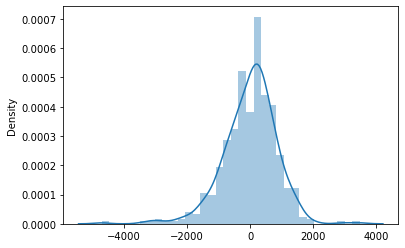

In [118]:
res=y_train-y_train_pred
sns.distplot(res)

In [ ]:
####Prediction on the test set 

In [119]:
df_test  

,temp,atemp,hum,windspeed,cnt,season_2,season_3,season_4,yr_1,mnth_2,...,holiday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weathersit_2,weathersit_3
184,29.793347,33.27085,63.7917,5.459106,6043,0,1,0,0,0,...,1,1,0,0,0,0,0,0,1,0
535,32.082500,36.04875,59.2083,7.625404,6211,1,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
299,19.270000,22.85230,81.2917,13.250121,2659,0,0,1,0,0,...,0,0,0,0,1,0,0,1,1,0
221,31.433347,34.24915,42.4167,13.417286,4780,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
152,29.315000,32.19710,30.5000,19.583229,4968,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,19.509153,23.45270,73.3750,11.666643,6606,0,0,1,1,0,...,0,0,1,0,0,0,0,1,0,0
127,21.661653,25.94665,63.1667,5.000712,4333,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
640,26.957500,29.95665,79.3750,4.458569,7572,0,0,1,1,0,...,0,0,0,1,0,0,0,1,1,0
72,13.333897,16.60000,49.6957,9.174042,2046,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [120]:
###Convert the uniform scalar values  

###Since the scale of some fields are different we need to make it into a common format
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
#num_vars = ['temp', 'atemp', 'hum', 'windspeed']
#df_test[num_vars] = scaler.fit_transform(df_test[num_vars])
#df_test.head()

/Users/hari/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


,temp,atemp,hum,windspeed,cnt,season_2,season_3,season_4,yr_1,mnth_2,...,holiday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weathersit_2,weathersit_3
184,0.837241,0.778767,0.534223,0.149393,6043,0,1,0,0,0,...,1,1,0,0,0,0,0,0,1,0
535,0.911423,0.855132,0.470417,0.231142,6211,1,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
299,0.496221,0.492359,0.777843,0.443398,2659,0,0,1,0,0,...,0,0,0,0,1,0,0,1,1,0
221,0.890387,0.805661,0.236659,0.449707,4780,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
152,0.821739,0.749249,0.070765,0.682387,4968,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [121]:
df_test.describe()

,temp,atemp,hum,windspeed,cnt,season_2,season_3,season_4,yr_1,mnth_2,...,holiday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weathersit_2,weathersit_3
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.546074,0.530791,0.508362,0.418803,4560.559091,0.263636,0.245455,0.236364,0.481818,0.100000,...,0.036364,0.127273,0.168182,0.100000,0.163636,0.177273,0.118182,0.700000,0.318182,0.027273
std,0.248645,0.227648,0.200875,0.187683,1904.968544,0.441609,0.431338,0.425817,0.500809,0.300684,...,0.187620,0.334038,0.374881,0.300684,0.370789,0.382770,0.323559,0.459303,0.466833,0.163248
min,0.000000,0.000000,0.000000,0.000000,441.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.329310,0.333953,0.361079,0.284201,3312.750000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.545492,0.543153,0.491299,0.403318,4582.500000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.756414,0.719758,0.650989,0.523975,5913.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,8395.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [122]:
###Split the df_test value to x and Y cordinates.
y_test=df_test.pop('cnt')###drop of price since we are going to predict the price 
X_test=df_test


In [123]:
X_test_sm=sm.add_constant(X_test)
X_test_sm.head()

/Users/hari/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,temp,atemp,hum,windspeed,season_2,season_3,season_4,yr_1,mnth_2,...,holiday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weathersit_2,weathersit_3
184,1.0,0.837241,0.778767,0.534223,0.149393,0,1,0,0,0,...,1,1,0,0,0,0,0,0,1,0
535,1.0,0.911423,0.855132,0.470417,0.231142,1,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
299,1.0,0.496221,0.492359,0.777843,0.443398,0,0,1,0,0,...,0,0,0,0,1,0,0,1,1,0
221,1.0,0.890387,0.805661,0.236659,0.449707,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
152,1.0,0.821739,0.749249,0.070765,0.682387,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [124]:
X_test_sm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 184 to 653
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   const         220 non-null    float64
 1   temp          220 non-null    float64
 2   atemp         220 non-null    float64
 3   hum           220 non-null    float64
 4   windspeed     220 non-null    float64
 5   season_2      220 non-null    uint8  
 6   season_3      220 non-null    uint8  
 7   season_4      220 non-null    uint8  
 8   yr_1          220 non-null    uint8  
 9   mnth_2        220 non-null    uint8  
 10  mnth_3        220 non-null    uint8  
 11  mnth_4        220 non-null    uint8  
 12  mnth_5        220 non-null    uint8  
 13  mnth_6        220 non-null    uint8  
 14  mnth_7        220 non-null    uint8  
 15  mnth_8        220 non-null    uint8  
 16  mnth_9        220 non-null    uint8  
 17  mnth_10       220 non-null    uint8  
 18  mnth_11       220 non-null  

In [125]:
X_test_sm=X_test_sm.drop(["temp","atemp","hum","season_3","season_2","season_4"],axis=1)
X_test_sm.head()

,const,windspeed,yr_1,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,...,holiday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weathersit_2,weathersit_3
184,1.0,0.149393,0,0,0,0,0,0,1,0,...,1,1,0,0,0,0,0,0,1,0
535,1.0,0.231142,1,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
299,1.0,0.443398,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
221,1.0,0.449707,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
152,1.0,0.682387,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0


In [ ]:
### prediction on the Test data 

In [126]:
y_test_pred=lr_model.predict(X_test_sm)
y_test_pred

184    3284.703021
535    7173.834599
299    3593.751477
221    4601.923751
152    4253.681884
          ...     
702    4965.052949
127    4430.118522
640    6317.068435
72     3044.252789
653    6482.772712
Length: 220, dtype: float64

In [128]:
##Evaluate the model 
##For this model we have to import the sklearn.merics  import r2_score
##For Evalaution of the Y_test
from sklearn.metrics  import r2_score
r2_score(y_true=y_test,y_pred=y_test_pred)

0.7448549540610594

In [129]:
##Create first model 
lr=sm.OLS(y_test,X_test_sm)
lr_model=lr.fit()
lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     36.92
Date:                Tue, 17 May 2022   Prob (F-statistic):           6.12e-58
Time:                        14:45:16   Log-Likelihood:                -1793.4
No. Observations:                 220   AIC:                             3633.
Df Residuals:                     197   BIC:                             3711.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1481.1520    320.978      4.614      0.000     848.157    2114.147
windspeed     -416.7361    349.368     -1.193      0.234   -1105.717     272.244
yr_1          2135.9026    126.088     16.940      0.000    1887.247    2384.558
mnth_2         329.3475    295.247      1.115      0.266    -252.903     911.598
mnth_3        1526.6456    340.552      4.483      0.000     855.051    2198.240
mnth_4        2339.3908    298.511      7.837      0.000    1750.705    2928.077
mnth_5        3087.9490    304.713     10.134      0.000    2487.031    3688.867
mnth_6        3347.1772    296.658     11.283      0.000    2762.143    3932.211
mnth_7        3179.5232    296.520     10.723      0.000    2594.763    3764.283
mnth_8        3167.2494    336.112      9.423      0.000    2504.410    3830.089
mnth_9        3436.9524    303.664     11.318      0.000    2838.104    4035.801
mnth_10       3384.1981    313.149     10.807      0.000    2766.643    4001.753
mnth_11       1706.6405    324.584      5.258      0.000    1066.536    2346.745
mnth_12        687.2168    307.896      2.232      0.027      80.022    1294.412
holiday_1     -239.8603    307.959     -0.779      0.437    -847.180     367.460
weekday_1     -268.2012    160.182     -1.674      0.096    -584.093      47.691
weekday_2        9.9999    153.586      0.065      0.948    -292.883     312.883
weekday_3      139.7556    186.024      0.751      0.453    -227.099     506.611
weekday_4      144.0023    159.531      0.903      0.368    -170.606     458.610
weekday_5       68.5463    150.737      0.455      0.650    -228.719     365.811
weekday_6      288.5704    241.158      1.197      0.233    -187.011     764.152
workingday_1   333.9632    141.911      2.353      0.020      54.103     613.823
weathersit_2  -643.2536    139.560     -4.609      0.000    -918.476    -368.031
weathersit_3 -1983.6381    400.421     -4.954      0.000   -2773.299   -1193.977
==============================================================================
Omnibus:                       22.385   Durbin-Watson:                   1.795
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.324
Skew:                          -0.554   Prob(JB):                     2.89e-09
Kurtosis:                       4.749   Cond. No.                     1.47e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.34e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
####For both the Data we got the same Ajusted R2 value which is 0.783

In [ ]:
###RFE  recursive feature elimination 

In [233]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

lm_rfe=LinearRegression()   ##linear regression for RFE 
lm_rfe.fit(X_train,y_train)
rfe=RFE(lm_rfe,10)##running RFE
rfe=rfe.fit(X_train,y_train)


/Users/hari/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_features_to_select=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [234]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))## Ranking is the i,portance of variable from 1 to other number 
##1 Is the number we pick as best varible and others we ignore  

[('temp', True, 1),
 ('atemp', False, 11),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', False, 6),
 ('season_4', True, 1),
 ('yr_1', True, 1),
 ('mnth_2', False, 12),
 ('mnth_3', False, 7),
 ('mnth_4', False, 9),
 ('mnth_5', False, 8),
 ('mnth_6', False, 10),
 ('mnth_7', False, 13),
 ('mnth_8', True, 1),
 ('mnth_9', True, 1),
 ('mnth_10', False, 5),
 ('mnth_11', False, 14),
 ('mnth_12', False, 15),
 ('holiday_1', True, 1),
 ('weekday_1', False, 16),
 ('weekday_2', False, 17),
 ('weekday_3', False, 19),
 ('weekday_4', False, 20),
 ('weekday_5', False, 18),
 ('weekday_6', False, 3),
 ('workingday_1', False, 4),
 ('weathersit_2', False, 2),
 ('weathersit_3', True, 1)]

In [235]:
X_train.columns[rfe.support_]####Supporting variable 

Index(['temp', 'hum', 'windspeed', 'season_2', 'season_4', 'yr_1', 'mnth_8',
       'mnth_9', 'holiday_1', 'weathersit_3'],
      dtype='object')

In [236]:
X_train.columns[~rfe.support_]###Non supporting variable 

Index(['atemp', 'season_3', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6',
       'mnth_7', 'mnth_10', 'mnth_11', 'mnth_12', 'weekday_1', 'weekday_2',
       'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6', 'workingday_1',
       'weathersit_2'],
      dtype='object')

In [237]:
##Use only supportive variables in xtrain
X_train_rfe=X_train[X_train.columns[rfe.support_]]

In [238]:
X_train_rfe

,temp,hum,windspeed,season_2,season_4,yr_1,mnth_8,mnth_9,holiday_1,weathersit_3
576,0.815169,0.725633,0.264686,0,0,1,0,0,0,0
426,0.442393,0.640189,0.255342,0,0,1,0,0,0,0
728,0.245101,0.498067,0.663106,0,0,1,0,0,0,0
482,0.395666,0.504508,0.188475,1,0,1,0,0,0,0
111,0.345824,0.751824,0.380981,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
578,0.863973,0.679690,0.187140,0,0,1,1,0,0,0
53,0.202618,0.435939,0.111379,0,0,0,0,0,0,0
350,0.248216,0.577930,0.431816,0,1,0,0,0,0,0
79,0.462664,0.759870,0.529881,1,0,0,0,0,0,0


In [239]:
##Adding constant to the X_train
X_train_rfe=sm.add_constant(X_train_rfe)
X_train_rfe

/Users/hari/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,temp,hum,windspeed,season_2,season_4,yr_1,mnth_8,mnth_9,holiday_1,weathersit_3
576,1.0,0.815169,0.725633,0.264686,0,0,1,0,0,0,0
426,1.0,0.442393,0.640189,0.255342,0,0,1,0,0,0,0
728,1.0,0.245101,0.498067,0.663106,0,0,1,0,0,0,0
482,1.0,0.395666,0.504508,0.188475,1,0,1,0,0,0,0
111,1.0,0.345824,0.751824,0.380981,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,0.863973,0.679690,0.187140,0,0,1,1,0,0,0
53,1.0,0.202618,0.435939,0.111379,0,0,0,0,0,0,0
350,1.0,0.248216,0.577930,0.431816,0,1,0,0,0,0,0
79,1.0,0.462664,0.759870,0.529881,1,0,0,0,0,0,0


In [240]:
###Running the linear Model 
###Run teh linear Model 
ls_rfe=sm.OLS(y_train,X_train_rfe).fit()


In [241]:
ls_rfe.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     248.8
Date:                Tue, 17 May 2022   Prob (F-statistic):          1.02e-186
Time:                        17:38:06   Log-Likelihood:                -4130.6
No. Observations:                 510   AIC:                             8283.
Df Residuals:                     499   BIC:                             8330.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2416.5950    227.043     10.644      0.000    1970.517    2862.673
temp          4919.4753    190.435     25.833      0.000    4545.322    5293.628
hum          -2475.4491    274.259     -9.026      0.000   -3014.295   -1936.604
windspeed    -1749.2120    226.317     -7.729      0.000   -2193.863   -1304.561
season_2       879.1308     96.782      9.084      0.000     688.980    1069.282
season_4      1310.7713     94.710     13.840      0.000    1124.692    1496.851
yr_1          1968.2166     72.196     27.262      0.000    1826.371    2110.062
mnth_8         430.7069    144.873      2.973      0.003     146.072     715.342
mnth_9        1034.2712    144.177      7.174      0.000     751.003    1317.540
holiday_1     -776.4384    227.781     -3.409      0.001   -1223.966    -328.910
weathersit_3 -1665.0478    222.131     -7.496      0.000   -2101.475   -1228.621
==============================================================================
Omnibus:                       56.891   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              105.867
Skew:                          -0.673   Prob(JB):                     1.03e-23
Kurtosis:                       4.781   Cond. No.                         15.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [242]:
print(ls_rfe.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     248.8
Date:                Tue, 17 May 2022   Prob (F-statistic):          1.02e-186
Time:                        17:38:29   Log-Likelihood:                -4130.6
No. Observations:                 510   AIC:                             8283.
Df Residuals:                     499   BIC:                             8330.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2416.5950    227.043     10.644   

In [ ]:
##Since all the P values is lessthan 0.05 this is the best model 
#Inference from the model:
#hum:A coefficient value of ‘-2475.4491’ indicated that a unit increase in yr variable, decrease the bike hire numbers by 2475.4491 units.
#yr:A coefficient value of ‘1968.2166’ indicated that a unit increase in yr variable, increases the bike hire numbers by 1968.2166 units.
#temp:A coefficient value of ‘4919.4753'  indicated that a unit increase in temp variable, increases the bike hire numbers by 4919.4753 units.
#windspeed:A coefficient value of ‘-1749.2120'  indicated that, a unit increase in windspeed variable decreases the bike hire numbers by 1749.2120 units.
#season_2::A coefficient value of '879.1308' indicated that a unit increase in season_2 variable, increases the bike hire numbers by 879.1308 units.
#season_4::A coefficient value of '1310.7713' indicated that a unit increase in season_4 variable, increases the bike hire numbers by 1310.7713 units.
#mnth_9::A coefficient value of '1034.2712' indicated that a unit increase in mnth_9 variable, increases the bike hire numbers by 1034.2712 units.
#mnth_8::A coefficient value of '430.7069' indicated that a unit increase in mnth_9 variable, increases the bike hire numbers by 430.7069 units.
#weathersit_3::A coefficient value of '-1665.0478' indicated that, a unit increase in weathersit_3 variable decreases the bike hire numbers by 1665.0478 units.
#holiday_1::A coefficient value of '-776.438' indicated that, a unit increase in weathersit_3 variable decreases the bike hire numbers by 776.438 units.


In [243]:
### Calculate VIF for the New Model

vif=pd.DataFrame()
vif["Features"]=X_train_rfe.columns
vif["VIF"]=[variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif["VIF"]=round(vif['VIF'],2)
vif=vif.sort_values(by ="VIF",ascending=False)
vif

,Features,VIF
0,const,40.55
1,temp,1.45
7,mnth_8,1.43
4,season_2,1.37
5,season_4,1.31
2,hum,1.26
8,mnth_9,1.21
3,windspeed,1.16
10,weathersit_3,1.11
6,yr_1,1.02


In [244]:
#Residual Analysis of the Train dataset:
y_train_pred=ls_rfe.predict(X_train_rfe)

In [245]:
res = y_train-y_train_pred

/Users/hari/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

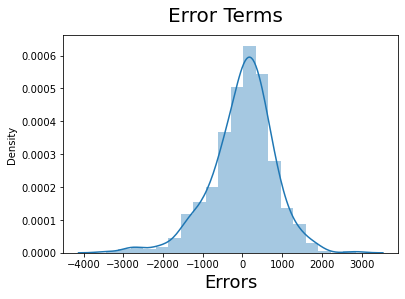

In [246]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

#Observation: Residual Errors are normally disributed

In [247]:
#Making predictions using the test dataset
df_test.head(10)

,temp,atemp,hum,windspeed,season_2,season_3,season_4,yr_1,mnth_2,mnth_3,...,holiday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weathersit_2,weathersit_3
184,29.793347,33.27085,63.7917,5.459106,0,1,0,0,0,0,...,1,1,0,0,0,0,0,0,1,0
535,32.082500,36.04875,59.2083,7.625404,1,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
299,19.270000,22.85230,81.2917,13.250121,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,1,0
221,31.433347,34.24915,42.4167,13.417286,0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
152,29.315000,32.19710,30.5000,19.583229,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
404,10.865000,13.09940,56.2083,13.000479,0,0,0,1,1,0,...,0,0,0,0,1,0,0,1,0,0
198,30.613347,35.19625,65.1250,14.458868,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
171,27.914153,31.88230,77.0417,11.458675,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
512,29.212500,33.96500,67.6250,13.166907,1,0,0,1,0,0,...,1,1,0,0,0,0,0,0,0,0
200,31.501653,37.34250,70.7083,7.625739,0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [255]:
X_train_rfe=X_train_rfe.drop("const",axis=1)

In [278]:
df_test

,temp,atemp,hum,windspeed,season_2,season_3,season_4,yr_1,mnth_2,mnth_3,...,holiday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weathersit_2,weathersit_3
184,29.793347,33.27085,63.7917,5.459106,0,1,0,0,0,0,...,1,1,0,0,0,0,0,0,1,0
535,32.082500,36.04875,59.2083,7.625404,1,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
299,19.270000,22.85230,81.2917,13.250121,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,1,0
221,31.433347,34.24915,42.4167,13.417286,0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
152,29.315000,32.19710,30.5000,19.583229,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,19.509153,23.45270,73.3750,11.666643,0,0,1,1,0,0,...,0,0,1,0,0,0,0,1,0,0
127,21.661653,25.94665,63.1667,5.000712,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
640,26.957500,29.95665,79.3750,4.458569,0,0,1,1,0,0,...,0,0,0,1,0,0,0,1,1,0
72,13.333897,16.60000,49.6957,9.174042,0,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0


In [293]:
#Applying scaling

num_vars = ["temp", 'atemp', 'hum', 'windspeed']
df_test[num_vars] = scaler.transform(df_test[num_vars])

/Users/hari/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [297]:
df_test

,temp,atemp,hum,windspeed,season_2,season_3,season_4,yr_1,mnth_2,mnth_3,...,holiday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weathersit_2,weathersit_3
184,0.837241,0.778767,0.534223,0.149393,0,1,0,0,0,0,...,1,1,0,0,0,0,0,0,1,0
535,0.911423,0.855132,0.470417,0.231142,1,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
299,0.496221,0.492359,0.777843,0.443398,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,1,0
221,0.890387,0.805661,0.236659,0.449707,0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
152,0.821739,0.749249,0.070765,0.682387,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,0.503971,0.508864,0.667633,0.383644,0,0,1,1,0,0,...,0,0,1,0,0,0,0,1,0,0
127,0.573725,0.577423,0.525522,0.132095,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
640,0.745342,0.687659,0.751160,0.111637,0,0,1,1,0,0,...,0,0,0,1,0,0,0,1,1,0
72,0.303855,0.320482,0.337991,0.289582,0,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0


In [298]:
#y_test = df_test.pop('cnt')
X_test = df_test

In [299]:
#Selecting the variables that were part of final model.
col1=X_train_rfe.columns
col1

Index(['temp', 'hum', 'windspeed', 'season_2', 'season_4', 'yr_1', 'mnth_8',
       'mnth_9', 'holiday_1', 'weathersit_3'],
      dtype='object')

In [300]:
y_test

184    6043
535    6211
299    2659
221    4780
152    4968
       ... 
702    6606
127    4333
640    7572
72     2046
653    7534
Name: cnt, Length: 220, dtype: int64

In [301]:
X_test

,temp,atemp,hum,windspeed,season_2,season_3,season_4,yr_1,mnth_2,mnth_3,...,holiday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weathersit_2,weathersit_3
184,0.837241,0.778767,0.534223,0.149393,0,1,0,0,0,0,...,1,1,0,0,0,0,0,0,1,0
535,0.911423,0.855132,0.470417,0.231142,1,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
299,0.496221,0.492359,0.777843,0.443398,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,1,0
221,0.890387,0.805661,0.236659,0.449707,0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
152,0.821739,0.749249,0.070765,0.682387,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,0.503971,0.508864,0.667633,0.383644,0,0,1,1,0,0,...,0,0,1,0,0,0,0,1,0,0
127,0.573725,0.577423,0.525522,0.132095,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
640,0.745342,0.687659,0.751160,0.111637,0,0,1,1,0,0,...,0,0,0,1,0,0,0,1,1,0
72,0.303855,0.320482,0.337991,0.289582,0,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0


In [302]:
col1=X_train_rfe.columns
X_test=X_test[col1]

In [303]:
# Adding constant variable to test dataframe
X_test_lm = sm.add_constant(X_test)
X_test_lm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 184 to 653
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   const         220 non-null    float64
 1   temp          220 non-null    float64
 2   hum           220 non-null    float64
 3   windspeed     220 non-null    float64
 4   season_2      220 non-null    uint8  
 5   season_4      220 non-null    uint8  
 6   yr_1          220 non-null    uint8  
 7   mnth_8        220 non-null    uint8  
 8   mnth_9        220 non-null    uint8  
 9   holiday_1     220 non-null    uint8  
 10  weathersit_3  220 non-null    uint8  
dtypes: float64(4), uint8(7)
memory usage: 10.1 KB


/Users/hari/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [304]:
X_test_lm

,const,temp,hum,windspeed,season_2,season_4,yr_1,mnth_8,mnth_9,holiday_1,weathersit_3
184,1.0,0.837241,0.534223,0.149393,0,0,0,0,0,1,0
535,1.0,0.911423,0.470417,0.231142,1,0,1,0,0,0,0
299,1.0,0.496221,0.777843,0.443398,0,1,0,0,0,0,0
221,1.0,0.890387,0.236659,0.449707,0,0,0,1,0,0,0
152,1.0,0.821739,0.070765,0.682387,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
702,1.0,0.503971,0.667633,0.383644,0,1,1,0,0,0,0
127,1.0,0.573725,0.525522,0.132095,1,0,0,0,0,0,0
640,1.0,0.745342,0.751160,0.111637,0,1,1,0,0,0,0
72,1.0,0.303855,0.337991,0.289582,0,0,0,0,0,0,0


In [305]:
# Making predictions using the final model (lr)
y_pred = ls_rfe.predict(X_test_lm)
# Plotting y_test and y_pred to understand the spread


In [260]:
y_pred

184    -19254.452078
535      3187.425271
299   -125885.083764
221     29012.815194
152     37753.726869
           ...      
702   -100373.133020
127    -55253.566798
640    -65975.418921
72     -71054.149944
653    -59410.645253
Length: 220, dtype: float64

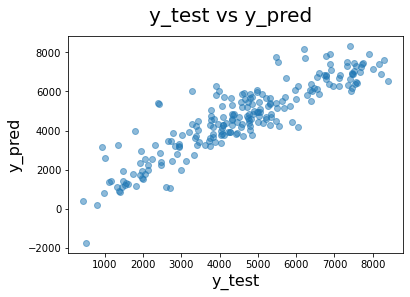

In [306]:
# Plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_pred, alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 16)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

In [307]:
from sklearn.metrics import r2_score
r_squared=r2_score(y_test, y_pred)
print('r_square_value of test :',r_squared)

r_square_value of test : 0.79387080145952


Text(0, 0.5, 'Views')

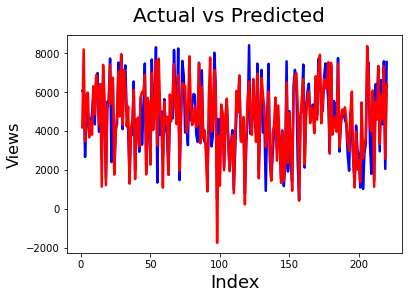

In [314]:
#Actual vs Predicted
c = [i for i in range(1,221,1)]
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_pred, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual vs Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Views', fontsize=16)                               # Y-label


In [315]:
# n is number of rows in X

n = X_test.shape[0]


# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r_squared)*(n-1)/(n-p-1)
print("Adjusted R2 of the Test:",adjusted_r2)

Adjusted R2 of the Test: 0.7840081603810282
